In [2]:
# import element tree under the alias of ET
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
from collections import Counter
from bisect import bisect_left

In [3]:
# 1a. Plot Age Distribution
# Load the patient data 
# pass the path of the xml document to enable the parsing process
tree = ET.parse('data/pset1-patients.xml')

# get the parent tag of the xml document
root = tree.getroot()

patients = []
for patient in root.find("patients").findall("patient"):
    name = patient.attrib.get("name", "Unknown")
    gender = patient.attrib.get("gender", "Unknown")
    try:
        age = float(patient.attrib["age"])
    # if "age" doesn’t exist or can’t be converted, set to None
    except (KeyError, ValueError):
        age = None

    patients.append({
        "name": name,
        "age": age,
        "gender": gender
    })

print("Total patients:", len(patients)) #324357 patients
print("First 5 records:", patients[:5])

Total patients: 324357
First 5 records: [{'name': 'Tammy Martin', 'age': 19.529988374393394, 'gender': 'female'}, {'name': 'Lucy Stribley', 'age': 1.6021974892211832, 'gender': 'female'}, {'name': 'Albert Trevino', 'age': 19.317022680802072, 'gender': 'male'}, {'name': 'Troy Armour', 'age': 79.44120768829171, 'gender': 'male'}, {'name': 'Jose Masseria', 'age': 71.20386333449743, 'gender': 'male'}]


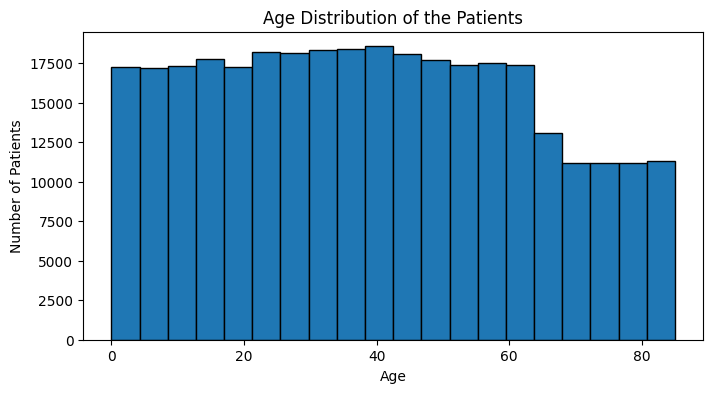

In [4]:
# Plot a histogram showing the distribution of ages
ages = []
for p in patients:
    if p["age"] is not None:
        ages.append(p["age"])
len(ages) #324357 ages
hist_age_fig = plt.figure(figsize=(8,4))
plt.hist(ages, bins=20, edgecolor='black')
plt.title("Age Distribution of the Patients")
plt.xlabel("Age")
plt.ylabel("Number of Patients")
hist_age_fig.savefig("plots/1a_age.png", dpi=200, bbox_inches="tight")

In [5]:
# Determine if any patients share the same exact age.
# count how many times each age appears
age_counts = Counter(ages)

# keep only duplicates (count > 1)
dup_counts = {}
for age, count in age_counts.items():
    if count > 1:
        dup_counts[age] = count

print("Duplicates:", dup_counts)  # {} means none
print("Total with age:", len(ages), "; Unique ages:", len(age_counts))

Duplicates: {}
Total with age: 324357 ; Unique ages: 324357


Counter({'female': 165293, 'male': 158992, 'unknown': 72})
Encoding: `gender` attribute on <patient>.
Categories: ['female', 'male', 'unknown']
Counts: {'female': 165293, 'male': 158992, 'unknown': 72}


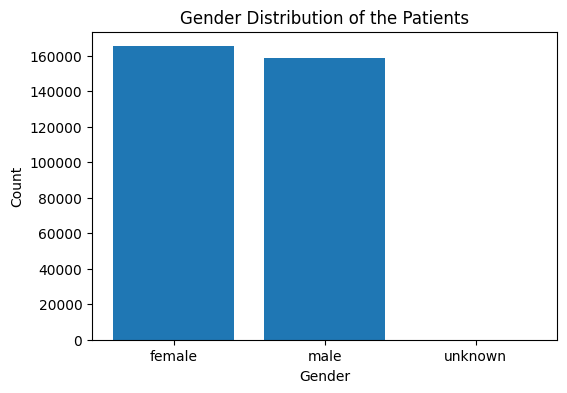

In [6]:
# 1b. Plot Gender Distribution
genders = []
for p in patients:
    genders.append(p["gender"])

gender_counts = Counter(genders)
print(gender_counts) #{'female': 165293, 'male': 158992, 'unknown': 72}

labels = ["female", "male", "unknown"]
values = []
for k in labels:
    values.append(gender_counts[k])

bar_gender_fig = plt.figure(figsize=(6,4))  
plt.bar(labels, values)
plt.title("Gender Distribution of the Patients")
plt.xlabel("Gender")
plt.ylabel("Count")
bar_gender_fig.savefig("plots/1b_gender.png", dpi=200, bbox_inches="tight")

# Identify how gender is encoded in the data and list the categories used
print("Encoding: `gender` attribute on <patient>.")
print("Categories:", sorted(gender_counts.keys()))
print("Counts:", dict(gender_counts))

In [7]:
# 1c. Sort Patients by Age
# descending by age
patients_sorted = sorted(patients, key=lambda p: p["age"], reverse=True)
oldest = patients_sorted[0] 
oldest

{'name': 'Monica Caponera', 'age': 84.99855742449432, 'gender': 'female'}

In [8]:
# 1d. Finding the Second Oldest Patient
def second_oldest(patients):
    top = None
    second = None
    for p in patients:
        a = p["age"]
        if top is None or a > top:
            if top is not None:
                second = top
            top = a
        elif second is None or a > second:
            second = a
    if second is None:
        return None, []
    
    # Returns a list of all matching patients (though each age is unique in this dataset)
    second_oldest_p = [p for p in patients if p["age"] == second]
    return second, second_oldest_p
second_oldest(patients)

(84.9982928781625,
 [{'name': 'Raymond Leigh', 'age': 84.9982928781625, 'gender': 'male'}])

In [9]:
# 2e. Binary Search for Specific Age
patients_sorted_ascend = sorted(patients, key=lambda p: p["age"])
ages_sorted_ascend = [p["age"] for p in patients_sorted_ascend] 
target = 41.5

# bisect_left gives the first position where 41.5 fits in the sorted list.
i = bisect_left(ages_sorted_ascend, target) 

# If 41.5 is present, that index is its first occurrence; 
if i < len(ages_sorted_ascend) and ages_sorted_ascend[i] == target:
    match = patients_sorted_ascend[i]
    print("Match:", match)
# otherwise it’s the insert spot (i.e., no match is found).
else: 
    first_match = None
    print("No exact 41.5 found.")

Match: {'name': 'John Braswell', 'age': 41.5, 'gender': 'male'}


In [10]:
# 1f. Count Patients Above a Certain Age
# i = bisect_left(ages_sorted_ascend, target) gives the first index with age >= 41.5
count = len(ages_sorted_ascend) - i  # all patients from index i to end
count 

150471

In [11]:
# 1g. Function for Age Range Query
def count_in_age_range(ages_sorted_ascend, low_age, high_age):
    if high_age <= low_age:
        return 0  
    low_index = bisect_left(ages_sorted_ascend, low_age)    # first index with age >= low_age
    high_index = bisect_left(ages_sorted_ascend, high_age)  # first index with age >= high_age
    return max(0, high_index - low_index)

In [12]:
# Test for 1g
def run_tests_1g():
    a = ages_sorted_ascend  
    n = len(a)

    tests = [
        # normal ranges that span all ages; should add up to n (324357)
        ("[0, 21)", 0, 21),
        ("[21, 35)", 21, 35),
        ("[35, 50)", 35, 50),
        ("[50, 70)", 50, 70),
        ("[70, 90)", 70, 90),
        ("[90, 100)", 90, 100), #should be 0 in our dataset 

        # small ranges
        ("[41.5, 41.9)", 41.5, 41.9),
        ("[60, 61)", 60, 61),
        
        # boundary cases
        ("empty when low==high", 41.5, 41.5), #should be 0
        ("spans all ages", -1e9, 1e9), #should be n

        # degenerate cases
        ("below min", -100, 0), #should be 0
        ("above max", 200, 300), #should be 0
    
        # check using 41.5
        ("just below 41.5", 41.4999999, 41.5), #should be 0
        ("just above 41.5", 41.5, 41.5000001), #should be 1
    ]

    for label, low, high in tests:
        number = count_in_age_range(a, low, high)
        print(f"{label}: {number}")

    # Expanding the interval shouldn't decrease the count
    assert count_in_age_range(a, 40, 50) <= count_in_age_range(a, 18, 50)
    assert count_in_age_range(a, 10, 40) >= count_in_age_range(a, 10, 25)

    # another test for non-overlapping pieces add up to n (324357)
    left  = count_in_age_range(a, -1e9, 41.5)
    middle = count_in_age_range(a, 41.5, 41.5)   #should be 0
    right = count_in_age_range(a, 41.5, 1e9)
    assert left + middle + right == n

run_tests_1g()

[0, 21): 85645
[21, 35): 60091
[35, 50): 64112
[50, 70): 74894
[70, 90): 39615
[90, 100): 0
[41.5, 41.9): 1788
[60, 61): 4211
empty when low==high: 0
spans all ages: 324357
below min: 0
above max: 0
just below 41.5: 0
just above 41.5: 1


In [16]:
# 1h. Function for Age and Gender Range Query
# Build a sorted age list for males
male_ages_sorted_ascend = sorted(p["age"] for p in patients if p.get("gender") == "male")
print(len(male_ages_sorted_ascend))

def count_in_age_range_with_males(ages_sorted_ascend, male_ages_sorted_ascend, low_age, high_age):
    if high_age <= low_age:
        return 0, 0

    low_index = bisect_left(ages_sorted_ascend, low_age)
    high_index = bisect_left(ages_sorted_ascend, high_age)
    total_count = max(0, high_index - low_index)

    mlow_index = bisect_left(male_ages_sorted_ascend, low_age)
    mhigh_index = bisect_left(male_ages_sorted_ascend, high_age)
    male_count = max(0, mhigh_index - mlow_index)

    return total_count, male_count



158992


In [18]:
# Test for 1h
def run_tests_1h():
    a = ages_sorted_ascend
    m = male_ages_sorted_ascend
    n = len(a)
    n_male = len(m)

    tests = [
        # normal ranges that span all ages; totals should add up to count_in_age_range(a, 0, 100)
        ("[0, 21)", 0, 21),
        ("[21, 35)", 21, 35),
        ("[35, 50)", 35, 50),
        ("[50, 70)", 50, 70),
        ("[70, 90)", 70, 90),
        ("[90, 100)", 90, 100),  # should be 0 in our datasets

        # small ranges
        ("[41.5, 41.9)", 41.5, 41.9),
        ("[60, 61)", 60, 61),

        # boundary cases
        ("empty when low==high", 41.5, 41.5),  # should be 0
        ("spans all ages", -1e9, 1e9),         # should be n, n_male

        # degenerate cases
        ("below min", -100, 0),                # should be 0
        ("above max", 200, 300),               # should be 0

        # checks using 41.5
        ("just below 41.5", 41.4999999, 41.5),     # should be 0
        ("just above 41.5", 41.5, 41.5000001),     # should be 1
    ]

    total_bins_sum = 0
    male_bins_sum  = 0

    for label, low, high in tests:
        total_count, male_count = count_in_age_range_with_males(a, m, low, high)
        print(f"{label}: total={total_count}  males={male_count}")

        assert 0 <= male_count <= total_count

        if label in {"[0, 21)", "[21, 35)", "[35, 50)", "[50, 70)", "[70, 90)", "[90, 100)"}:
            total_bins_sum += total_count
            male_bins_sum  += male_count

    # Partition sums equal the full 0–100 query
    full_total_0_100, full_male_0_100 = count_in_age_range_with_males(a, m, 0, 100)
    assert total_bins_sum == full_total_0_100
    assert male_bins_sum  == full_male_0_100

    # Expanding the interval shouldn't decrease counts (totals and males)
    t1, m1 = count_in_age_range_with_males(a, m, 40, 50)
    t2, m2 = count_in_age_range_with_males(a, m, 18, 50)
    assert t1 <= t2 and m1 <= m2
    t3, m3 = count_in_age_range_with_males(a, m, 10, 40)
    t4, m4 = count_in_age_range_with_males(a, m, 10, 25)
    assert t3 >= t4 and m3 >= m4

    # Non-overlapping pieces add up to the whole (around 41.5)
    left_t, left_m   = count_in_age_range_with_males(a, m, -1e9, 41.5)
    middle_t,  middle_m    = count_in_age_range_with_males(a, m,  41.5, 41.5)  # should be 0
    right_t, right_m = count_in_age_range_with_males(a, m,  41.5, 1e9)
    assert (left_t + middle_t + right_t) == count_in_age_range_with_males(a, m, -1e9, 1e9)[0]
    assert (left_m + middle_m + right_m) == count_in_age_range_with_males(a, m, -1e9, 1e9)[1]

run_tests_1h()


[0, 21): total=85645  males=43648
[21, 35): total=60091  males=29895
[35, 50): total=64112  males=31751
[50, 70): total=74894  males=35768
[70, 90): total=39615  males=17930
[90, 100): total=0  males=0
[41.5, 41.9): total=1788  males=905
[60, 61): total=4211  males=2060
empty when low==high: total=0  males=0
spans all ages: total=324357  males=158992
below min: total=0  males=0
above max: total=0  males=0
just below 41.5: total=0  males=0
just above 41.5: total=1  males=1
